# Project: Create a Convolutional Neural Network
- We will create a model on the [CIFAR-10 dataset](https://www.cs.toronto.edu/%7Ekriz/cifar.html)

### Step 1: Import libraries

In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from PIL import Image 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Download the CIFAR10 dataset
- Excute the cell below

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 303s 2us/step


### Step 3: Normalize the pixels
- Divide the **train_images** and **test_images** with 255 to normalize them between 0 and 1.

In [5]:
train_images = train_images/255.0

In [6]:
test_images = test_images/255.0

### Step 4: Get the class names of the labels
- Make a class name conversion.
    - HINT: make a list with the name **class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']**
- How to use the name conversion.
    - **class_names[int(train_labels[index])]**
- How to show an image
    - **plt.imshow(train_images[index])**

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'ship'

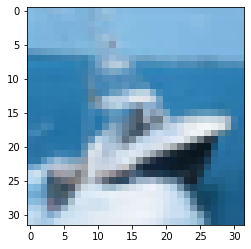

In [14]:
index = 8
plt.imshow(train_images[index])
class_names[int(train_labels[index])]

### Step 5: Create a model
- Create a **Sequential** model
    - **Conv2D** with 32 and (3, 3),  **activation='relu', input_shape=(32, 32, 3)**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='relu'**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='relu'**
    - **Flatten**
    - **Dense** with 64 nodes with **input_dim=4, activaition='relu'**
    - **Dense** with 10 (the output node)**
- Complie the model with **optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']**

In [46]:
model = models.Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, input_dim=4, activaition='relu'))
model.add(Dense(10))

TypeError: ('Keyword argument not understood:', 'activaition')

In [39]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Step 6: Train the model
- Fit the model with **train_images, train_labels, epochs=10** and **validation_data=(test_images, test_labels)**

In [40]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 5.6388 - accuracy: 0.0938 - val_loss: 5.4129 - val_accuracy: 0.1306
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 5.3208 - accuracy: 0.1457 - val_loss: 5.2225 - val_accuracy: 0.1556
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 5.1996 - accuracy: 0.1630 - val_loss: 5.1847 - val_accuracy: 0.1646
Epoch 4/10
1563/1563 [==============================] - 51s 32ms/step - loss: 5.1231 - accuracy: 0.1731 - val_loss: 5.1710 - val_accuracy: 0.1691
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 5.0737 - accuracy: 0.1810 - val_loss: 5.0475 - val_accuracy: 0.1851
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 5.0333 - accuracy: 0.1877 - val_loss: 5.0365 - val_accuracy: 0.1763
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 4.9991 - accuracy: 0.1937 - val_loss: 4.9793 -

### Stpe 7: Test the model
- Make predictions
    - assign the predictions of test_images to a variable
- How to test visually
    - Assign **index=0**
    - Plot the image with **plt.imshow(test_images[index])**
    - See the label from prediction by mapping it from **class_names**

In [41]:
y_pred = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


AttributeError: 'int' object has no attribute 'argmax'

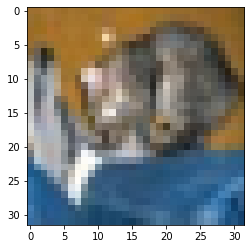

In [42]:
index = 0
plt.imshow(test_images[index])
class_names[y_pred[index.argmax]]

In [47]:
model.evaluate(test_images, test_lables, verbose=0)

NameError: name 'test_lables' is not defined

### Step 8 (Optional): Improve the model
- Try to play around with the model to improve the score